In [1]:
import qiskit
from qiskit.circuit import QuantumCircuit

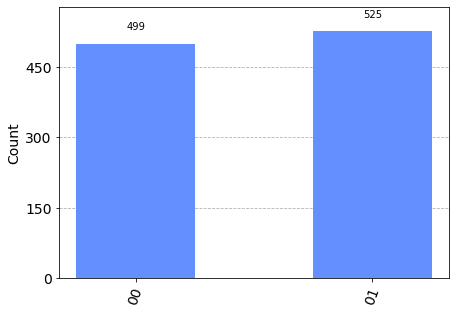

In [13]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# 创建一个量子电路，包含2个量子比特和2个经典比特
qc = QuantumCircuit(2, 2)

# 施加Hadamard门到第一个量子比特
qc.h(0)

# 测量量子比特，并将结果存储到经典比特中
qc.measure(0,0)

# 执行电路
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()

# 获取结果并显示直方图
counts = result.get_counts(qc)
plot_histogram(counts)

# 绘制量子电路
# qc.draw('mpl')


Bell 电路

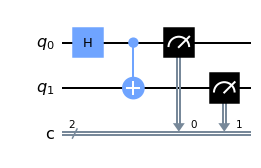

In [16]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# 创建一个量子电路，包含2个量子比特和2个经典比特
qc = QuantumCircuit(2, 2)

# 施加Hadamard门到第一个量子比特
qc.h(0)

# 施加CNOT门，第一个量子比特为控制比特，第二个量子比特为目标比特
qc.cx(0, 1)

# 测量量子比特，并将结果存储到经典比特中
qc.measure([0, 1], [0, 1])

# 执行电路
# backend = Aer.get_backend('qasm_simulator')
# job = execute(qc, backend, shots=1024)
# result = job.result()

# # 获取结果并显示直方图
# counts = result.get_counts(qc)
# plot_histogram(counts)

# 绘制量子电路
qc.draw('mpl')


GHZ

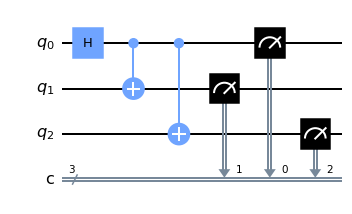

In [17]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# 创建一个量子电路，包含3个量子比特和3个经典比特
qc = QuantumCircuit(3, 3)

# 将第一个量子比特和第二个量子比特纠缠
qc.h(0)
qc.cx(0, 1)

# 将第一个和第二个量子比特与第三个量子比特纠缠
qc.cx(0, 2)

# 测量量子比特，并将结果存储到经典比特中
qc.measure([0, 1, 2], [0, 1, 2])

# 执行电路
# backend = Aer.get_backend('qasm_simulator')
# job = execute(qc, backend, shots=1024)
# result = job.result()

# # 获取结果并显示直方图
# counts = result.get_counts(qc)
# plot_histogram(counts)

# 绘制量子电路
qc.draw('mpl')


QFT

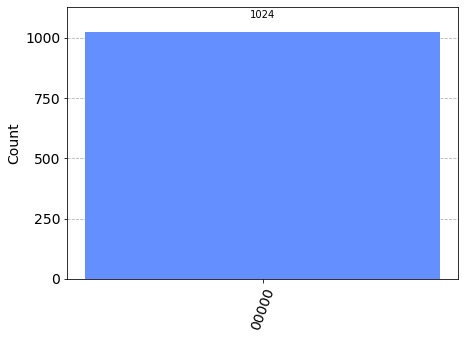

In [11]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def qft(circuit, n):
    """Applies QFT on the first n qubits in circuit"""
    for j in range(n):
        circuit.h(j)
        for k in range(j+1, n):
            circuit.cp(np.pi/2**(k-j), j, k)

    # Swap the qubits to reverse the order
    for i in range(n//2):
        circuit.swap(i, n-i-1)

# Number of qubits
n = 5

# Create a quantum circuit with n qubits
qc = QuantumCircuit(n)

# Initialize the qubits to a superposition state
qc.h(range(n))

# Apply QFT
qft(qc, n)

# Measure the qubits
qc.measure_all()

# Use Qiskit's Aer simulator to run the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()

# Get the measurement results
counts = result.get_counts(qc)

# Display the results as a histogram
plot_histogram(counts)
# plt.show()
# qc.draw('mpl')

QPE

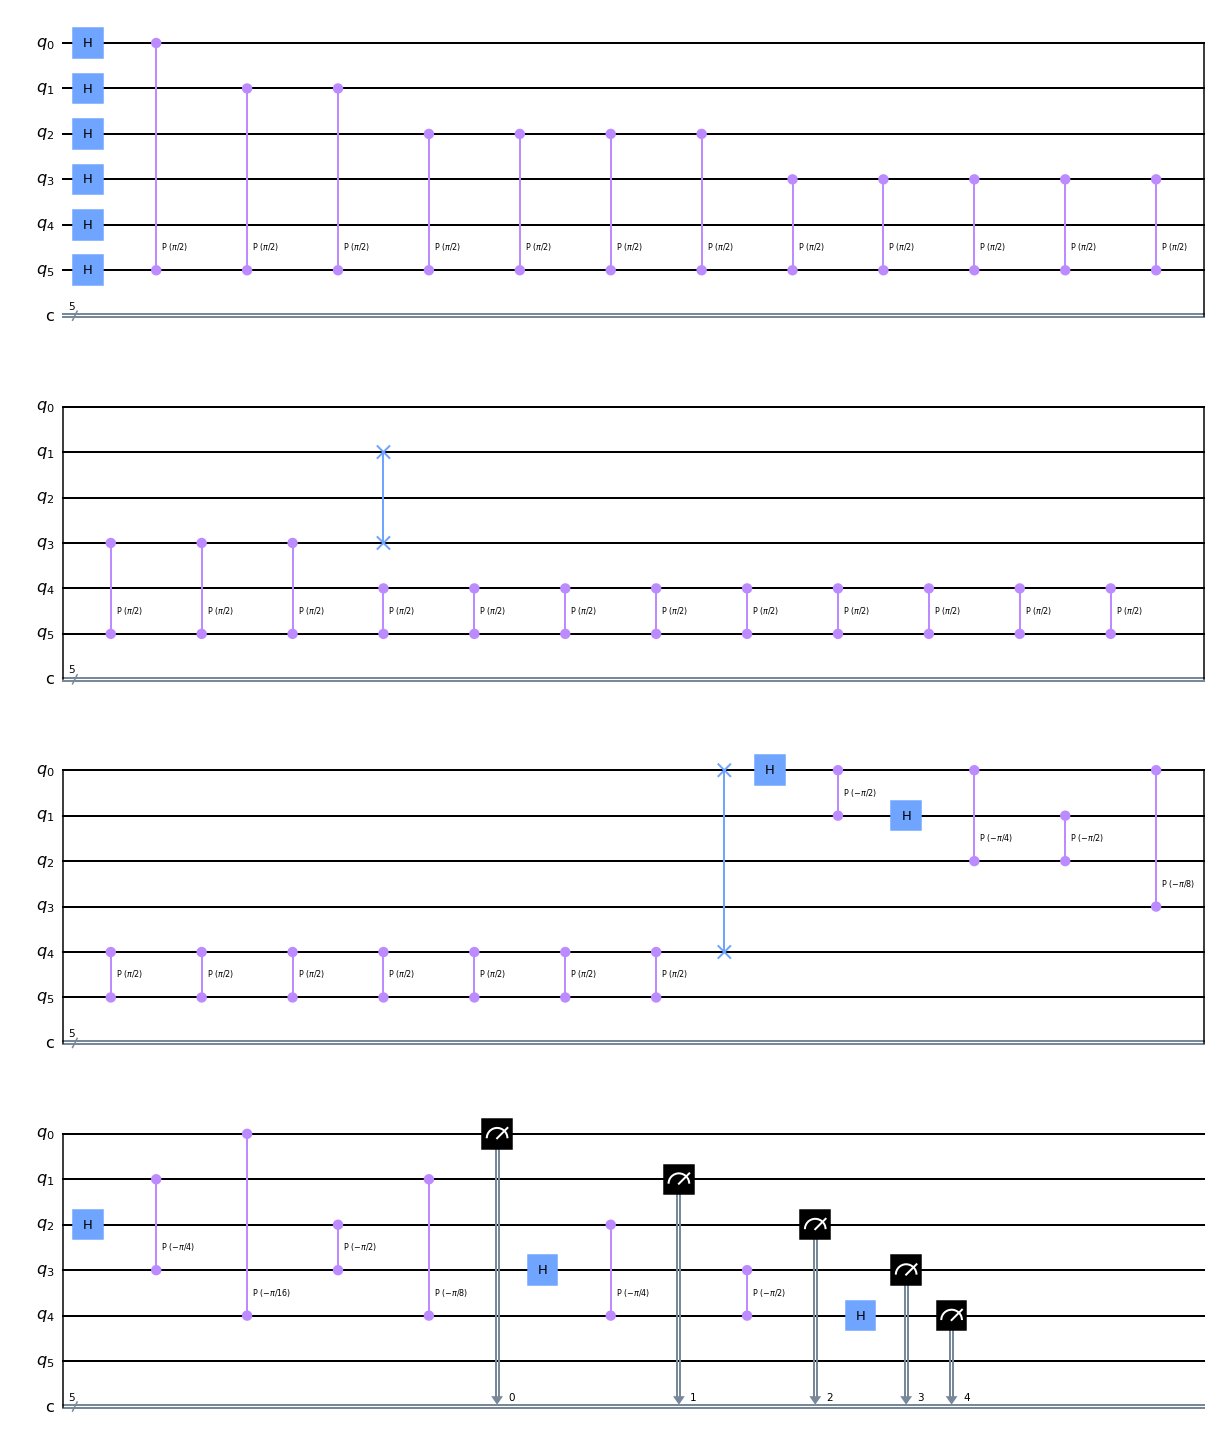

In [12]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

# Number of qubits in the counting register
n = 5

# Create a quantum circuit with n counting qubits plus one target qubit
qc = QuantumCircuit(n + 1, n)

# Initialize the target qubit in the |ψ⟩ state
qc.h(n)

# Apply Hadamard gates to the counting qubits
for qubit in range(n):
    qc.h(qubit)

# Apply controlled-U operations
for qubit in range(n):
    repetitions = 2 ** qubit
    for _ in range(repetitions):
        qc.cp(2 * np.pi * 0.25, qubit, n)  # Here, we assume θ = 0.25

# Apply inverse QFT to the counting register
for qubit in range(n//2):
    qc.swap(qubit, n-1-qubit)

for qubit in range(n):
    for k in range(qubit):
        qc.cp(-np.pi / (2 ** (qubit - k)), k, qubit)
    qc.h(qubit)

# Measure the counting register
qc.measure(range(n), range(n))

# Execute the circuit
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()

# Get the histogram of results
counts = result.get_counts(qc)
plot_histogram(counts)

# # Show the quantum circuit
qc.draw('mpl')


In [23]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

data = QuantumRegister(9, name='data')
mx = QuantumRegister(4, name='mx')
mz = QuantumRegister(4, name='mz')

rounds=1  # The actual number of rounds will always be more than 1, since the first round creates the quiescent state
measurements = [ClassicalRegister(8, name="c{}".format(i+1)) for i in range(rounds + 1)]
logical = QuantumRegister(1, name="logical")

base_circ = QuantumCircuit(data, mz, mx, *measurements, logical)

# [circ.x(i) for i in data]
def stabilize(circ, i):
    # Top left
    circ.h(mx[0])
    circ.cx(mx[0], data[1])
    circ.cx(mx[0], data[0])
    circ.h(mx[0])
    circ.cx(data[1], mz[0])
    circ.cx(data[4], mz[0])
    circ.cx(data[0], mz[0])
    circ.cx(data[3], mz[0])
    circ.barrier()
    
    # Top right
    circ.h(mx[1])
    circ.cx(mx[1], data[2])
    circ.cx(mx[1], data[1])
    circ.cx(mx[1], data[5])
    circ.cx(mx[1], data[4])
    circ.h(mx[1])
    circ.cx(data[2],mz[1])
    circ.cx(data[5],mz[1])
    circ.barrier()
    
    # Bottom left
    circ.cx(data[3], mz[2])
    circ.cx(data[6], mz[2])
    circ.h(mx[2])
    circ.cx(mx[2], data[4])
    circ.cx(mx[2], data[3])
    circ.cx(mx[2], data[7])
    circ.cx(mx[2], data[6])
    circ.h(mx[2])
    circ.barrier()

    # Bottom right
    circ.h(mx[3])
    circ.cx(mx[3], data[8])
    circ.cx(mx[3], data[7])
    circ.h(mx[3])
    circ.cx(data[5], mz[3])
    circ.cx(data[8], mz[3])
    circ.cx(data[4], mz[3])
    circ.cx(data[7], mz[3])
    circ.barrier()
    
    circ.measure(mz, measurements[i][0:4])
    circ.measure(mx, measurements[i][4:8])
    # circ.reset(mz)
    # circ.reset(mx)
    circ.barrier()

def get_stabilized_circ(base_circuit, rounds):
    circ = base_circuit.copy()
    for i in range(rounds + 1):
        stabilize(circ, i)
    return circ

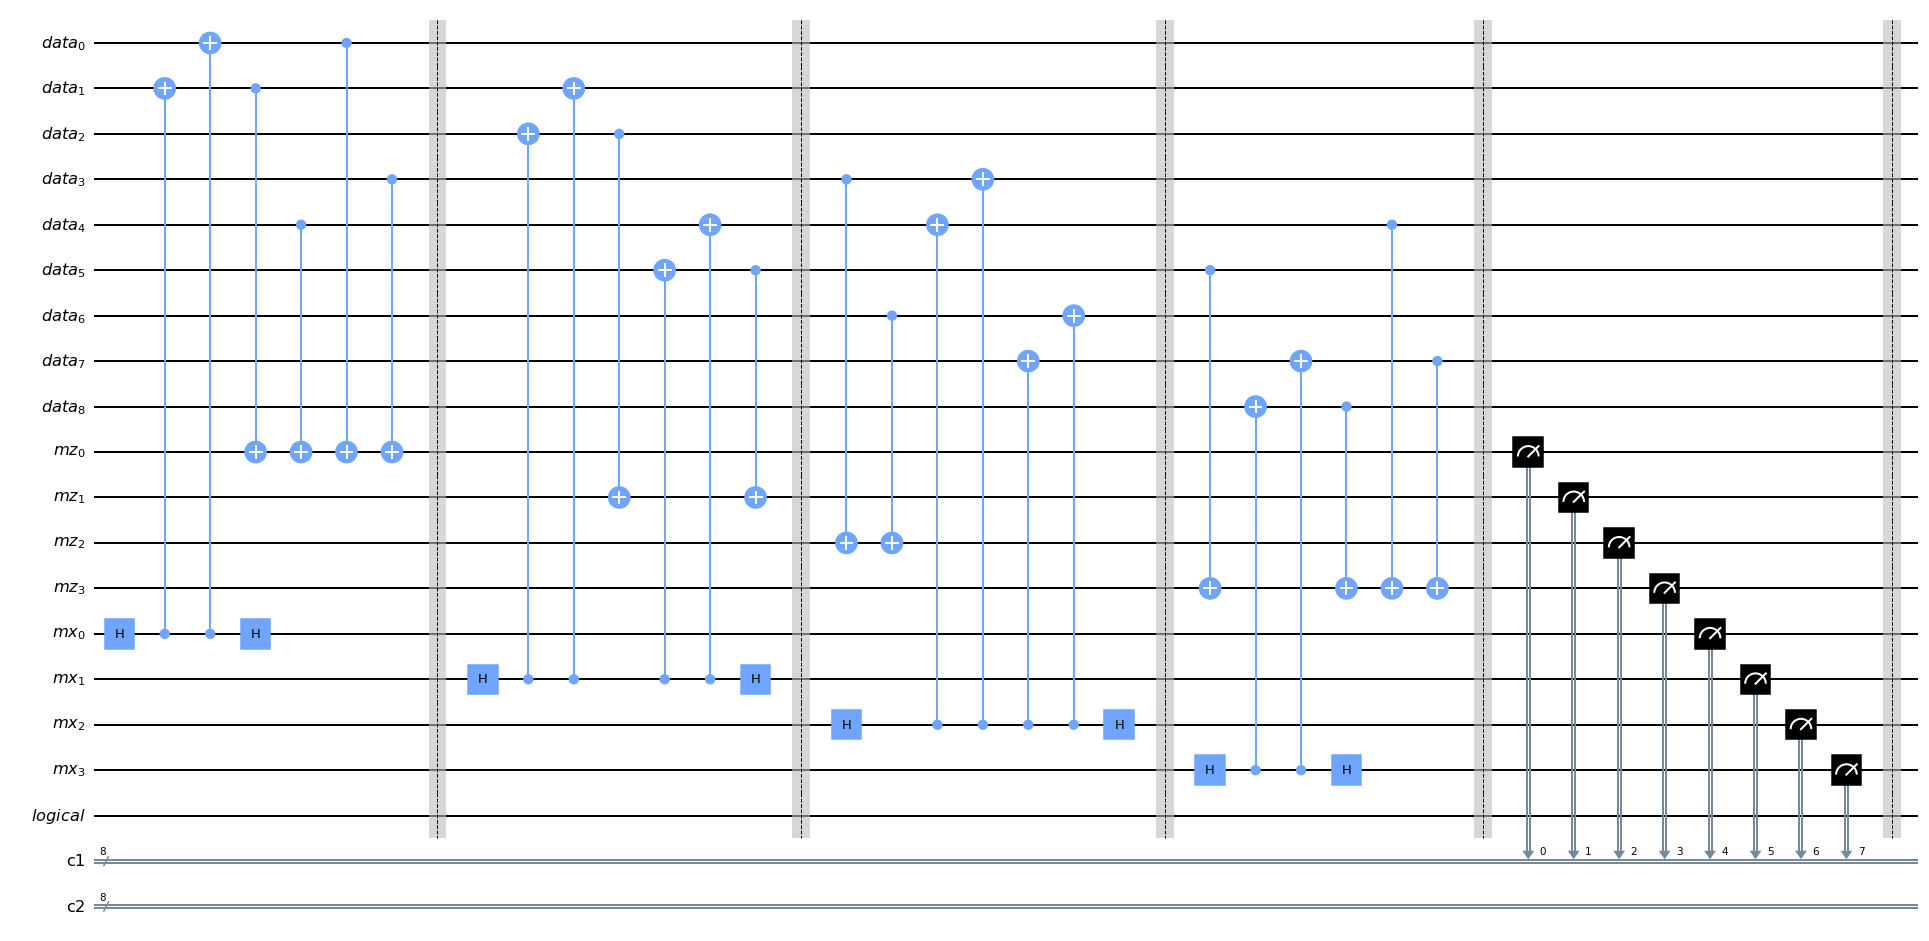

In [24]:
circ = get_stabilized_circ(base_circ, 0)
circ.draw(output='mpl', fold=150)